In [1]:
# Import necessary libraries:
from intake_esgf import ESGFCatalog
import matplotlib.pyplot as plt
import dask as dask
import numpy as np
import csv
import cartopy.crs as ccrs # this is a library we need for Robinson projection and I had to pip install cartopy
import xarray as xr

In [2]:
#Populate the Catalog - bringing in nothing from the catalog
cat = ESGFCatalog()
print(cat)  # <-- nothing to see here yet

Perform a search() to populate the catalog.


In [3]:
#Extract desired information from ESGF Catalog (i.e. chose CMIP6 models and variables)

models = ["ACCESS-ESM1-5","IPSL-CM6A-LR","CESM2","CanESM5","BCC-CSM2-MR", "GFDL-ESM4","MIROC-ES2L", "MPI-ESM1-2-HR", "NorESM2-LM","UKESM1-0-LL"]

cat.search(
    experiment_id="historical",
    source_id= models,
    frequency="mon",
    variable_id=["pr"],
)

cat.remove_ensembles()

   Searching indices:   0%|          |0/2 [       ?index/s]

Summary information for 10 results:
institution_id    [MPI-M, NOAA-GFDL, CSIRO, MOHC, MIROC, CCCma, ...
member_id                                      [r1i1p1f1, r1i1p1f2]
source_id         [MPI-ESM1-2-HR, GFDL-ESM4, ACCESS-ESM1-5, UKES...
table_id                                                     [Amon]
experiment_id                                          [historical]
activity_drs                                                 [CMIP]
variable_id                                                    [pr]
grid_label                                            [gn, gr1, gr]
mip_era                                                     [CMIP6]
project                                                     [CMIP6]
dtype: object

In [4]:
#Obtaining the datasets and loading it into a dictionary (putting it in the shopping cart)

dsd = cat.to_dataset_dict()

Get file information:   0%|          |0/2 [       ?index/s]

Adding cell measures:   0%|          |0/10 [     ?dataset/s]

In [5]:
#printing - to see full name of datasets
print(dsd.keys())

dict_keys(['MPI-M.r1i1p1f1.MPI-ESM1-2-HR.gn', 'CCCma.r1i1p1f1.CanESM5.gn', 'BCC.r1i1p1f1.BCC-CSM2-MR.gn', 'IPSL.r1i1p1f1.IPSL-CM6A-LR.gr', 'MOHC.r1i1p1f2.UKESM1-0-LL.gn', 'NOAA-GFDL.r1i1p1f1.GFDL-ESM4.gr1', 'NCC.r1i1p1f1.NorESM2-LM.gn', 'MIROC.r1i1p1f2.MIROC-ES2L.gn', 'NCAR.r1i1p1f1.CESM2.gn', 'CSIRO.r1i1p1f1.ACCESS-ESM1-5.gn'])


In [6]:
# Check min and max to check if they are in the correct range
min_value = min([ds['pr'].mean(dim='time').min().values for _,ds in dsd.items()])* 86400 / 999.8 * 1000
max_value = max([ds['pr'].mean(dim='time').max().values for _,ds in dsd.items()])* 86400 / 999.8 * 1000

print(max_value)
print(min_value)

76.0429193196618
0.0009201025234776007


In [7]:
# Find out which part of the name string is the model name 
datasets = list(dsd.keys())
model_name = 'MPI-ESM1-2-HR'

for dataset in datasets:
    parts = dataset.split('.')
    for part in parts:
        if model_name in part:
            model_index = parts.index(part)
            model_part = parts[model_index]  # Extracting the part corresponding to the index
            print("Model name '{}' found in '{}' at index {} in part '{}'.".format(model_name, dataset, model_index, model_part))


Model name 'MPI-ESM1-2-HR' found in 'MPI-M.r1i1p1f1.MPI-ESM1-2-HR.gn' at index 2 in part 'MPI-ESM1-2-HR'.


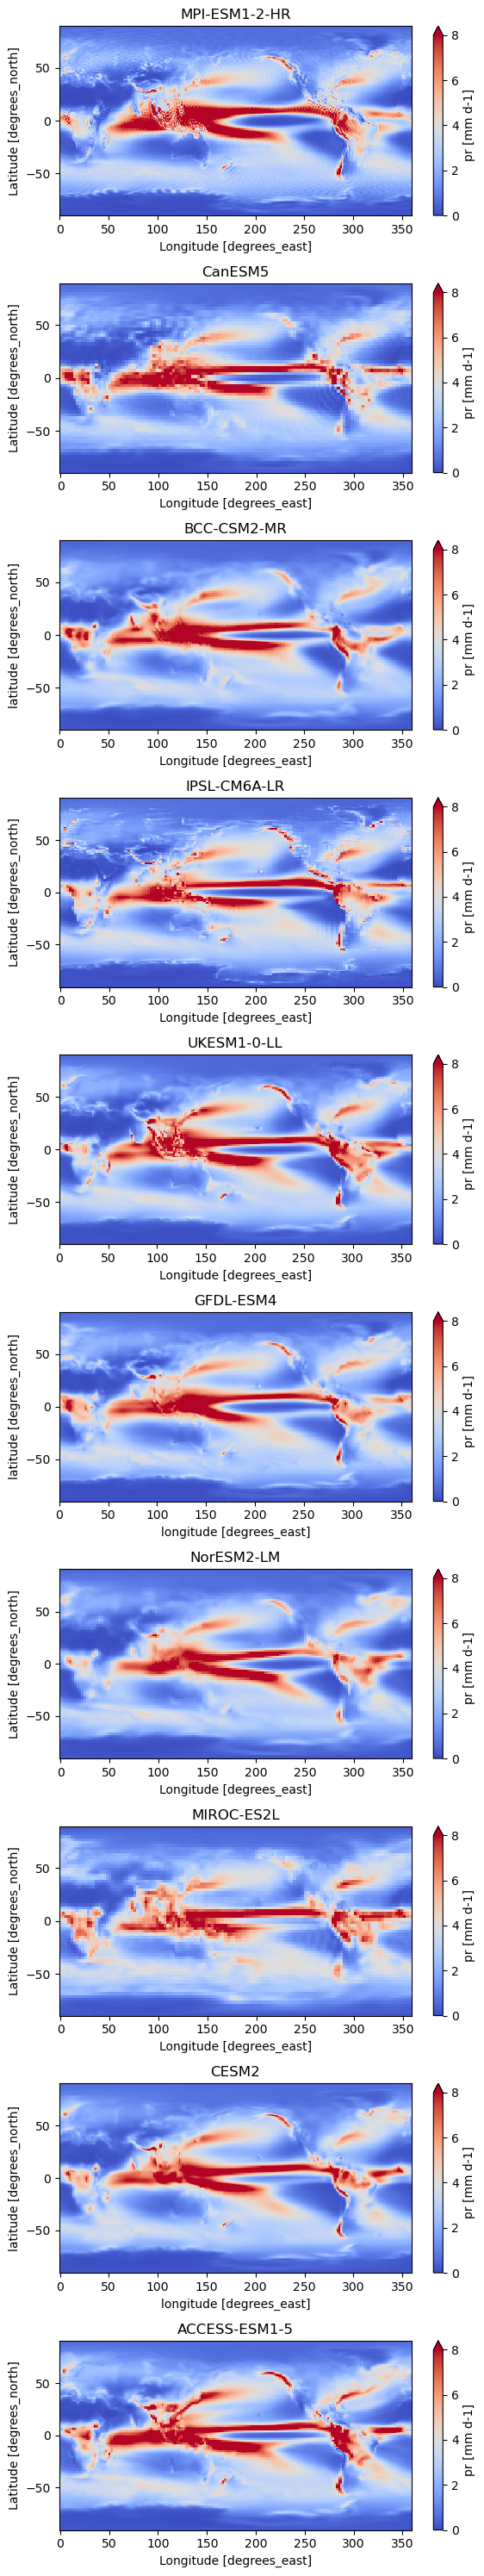

In [8]:
#Plots

# Adjust the subplot configuration to 6 rows to accommodate all datasets
fig, axs = plt.subplots(figsize=(6, 30), nrows=len(dsd.keys()))

# Now plot each dataset with the common vmin and vmax
datasets = list(dsd.keys())
titles = [key.split(".")[model_index] for key in datasets]

for i, (dataset, title) in enumerate(zip(datasets, titles)):
    ds = dsd[dataset]["pr"].mean(dim="time") * 86400 / 999.8 * 1000
    ds.plot(ax=axs[i], cmap="coolwarm", cbar_kwargs={"label": "pr [mm d-1]"},vmin=0, vmax=8)
    axs[i].set_title(title)

plt.tight_layout()

In [9]:
# Load each model in its own dataset

# list keys of model names
list_keys = (list(dsd.keys()))

# Find out which model to load weights into
for idx, item in enumerate(list_keys):
    if 'ACCESS' in item:
        model_1 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000
    if 'BCC' in item:
        model_2 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000
    if 'CanESM5' in item:
        model_3 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000
    if 'CESM2' in item:
        model_4 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000
    if 'GFDL' in item:
        model_5 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000
    if 'IPSL' in item:
        model_6 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000
    if 'MIROC' in item:
        model_7 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000
    if 'MPI' in item:
        model_8 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000
    if 'NorESM2' in item:
        model_9 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000
    if 'UKESM1' in item:
        model_10 = dsd[list_keys[idx]]["pr"].sel(time=slice('1980-01-01', '2013-12-01'))* 86400 / 999.8 * 1000 # .mean(dim="time") * 86400 * 1000

# Find out which model is CanESM (lowest resolution fo regridding)
for idx, item in enumerate(list_keys):
    if 'CanESM' in item:
        print(idx, item)
        break

model_CanESM_id = idx
print(model_CanESM_id)

1 CCCma.r1i1p1f1.CanESM5.gn
1


In [10]:
# Linear Interpolation /Regridding from this resource - part 1:

#Extract lat/lon grid from CanESM5
lat_target = dsd[list_keys[idx]]["pr"].lat.values
lon_target = dsd[list_keys[idx]]["pr"].lon.values

# # # Assuming 'dsd' is a dictionary of datasets, each representing a different model
# # ensemble_gpp = [dsd[model_2]["gpp"] for model_2 in dsd]

# # Assuming all datasets are on the same grid, you can concatenate them along a new dimension ('model')
# ensemble_gpp_concat = xr.concat(model_3, dim='model_2')

# # Calculate the mean across the 'model' dimension to get the ensemble mean
# ds_emean = ensemble_gpp_concat.mean(dim='model_2')

# Correctly using ds_emean for interpolation
pr_model_1_Regridded = model_1.interp(lat=lat_target, lon=lon_target)
pr_model_1_Regridded_mean = pr_model_1_Regridded.mean(dim="time")

pr_model_2_Regridded = model_2.interp(lat=lat_target, lon=lon_target)
pr_model_2_Regridded_mean = pr_model_2_Regridded.mean(dim="time")

pr_model_3_Regridded = model_3.interp(lat=lat_target, lon=lon_target)
pr_model_3_Regridded_mean = pr_model_3_Regridded.mean(dim="time")

pr_model_4_Regridded = model_4.interp(lat=lat_target, lon=lon_target)
pr_model_4_Regridded_mean = pr_model_4_Regridded.mean(dim="time")

pr_model_5_Regridded = model_5.interp(lat=lat_target, lon=lon_target)
pr_model_5_Regridded_mean = pr_model_5_Regridded.mean(dim="time")

pr_model_6_Regridded = model_6.interp(lat=lat_target, lon=lon_target)
pr_model_6_Regridded_mean = pr_model_6_Regridded.mean(dim="time")

pr_model_7_Regridded = model_7.interp(lat=lat_target, lon=lon_target)
pr_model_7_Regridded_mean = pr_model_7_Regridded.mean(dim="time")

pr_model_8_Regridded = model_8.interp(lat=lat_target, lon=lon_target)
pr_model_8_Regridded_mean = pr_model_8_Regridded.mean(dim="time")

pr_model_9_Regridded = model_9.interp(lat=lat_target, lon=lon_target)
pr_model_9_Regridded_mean = pr_model_9_Regridded.mean(dim="time")

pr_model_10_Regridded = model_10.interp(lat=lat_target, lon=lon_target)
pr_model_10_Regridded_mean = pr_model_10_Regridded.mean(dim="time")

In [11]:
# function for shifiting lon according to Bharat's code
def shift_lon(model):
    # First shift the lon dimension for the model average
    ds_tmp = model.copy(deep=True)
    ds_tmp['lon'] = ds_tmp['lon'] -180

    gpp_reshape = np.zeros(ds_tmp.shape)
    gpp_reshape[:,ds_tmp['lon'].size//2:] = ds_tmp[:,:ds_tmp['lon'].size//2].data
    gpp_reshape[:,:ds_tmp['lon'].size//2] = ds_tmp[:,ds_tmp['lon'].size//2:].data
    ds_tmp.data = gpp_reshape
    return ds_tmp 

In [12]:
# Shift every model
pr_model_1_Regridded_mean_shifted = shift_lon(pr_model_1_Regridded_mean)
pr_model_2_Regridded_mean_shifted = shift_lon(pr_model_2_Regridded_mean)
pr_model_3_Regridded_mean_shifted = shift_lon(pr_model_3_Regridded_mean)
pr_model_4_Regridded_mean_shifted = shift_lon(pr_model_4_Regridded_mean)
pr_model_5_Regridded_mean_shifted = shift_lon(pr_model_5_Regridded_mean)
pr_model_6_Regridded_mean_shifted = shift_lon(pr_model_6_Regridded_mean)
pr_model_7_Regridded_mean_shifted = shift_lon(pr_model_7_Regridded_mean)
pr_model_8_Regridded_mean_shifted = shift_lon(pr_model_8_Regridded_mean)
pr_model_9_Regridded_mean_shifted = shift_lon(pr_model_9_Regridded_mean)
pr_model_10_Regridded_mean_shifted = shift_lon(pr_model_10_Regridded_mean)

In [13]:
# Open the CSV file
with open('/Users/shamikbhattacharya/Documents/ORNL Folder 2 - Spring 2024/MWT_Implementation/Data/Weights_Pr.csv', newline='') as csvfile:
    # Create a CSV reader object
    reader = csv.DictReader(csvfile)
    
    # Initialize empty lists to store the weights
    weights = []
    weights_BMA100 = []
    weights_BMA1000 = []
    weights_sanderson_10 = []
    weights_sanderson_25 = []

    # Iterate over each row in the CSV file
    for row in reader:
        # Extract the weight from the desired column
        weight = row['Ensemble Mean']  # Change 'Ensemble Mean' to the desired column header
        # Check if the value is not empty before appending
        if weight:
            weights.append(weight)
        
        weight_BMA100 = row['BMA 100 sample']
        if weight_BMA100:
            weights_BMA100.append(weight_BMA100)
        
        weight_BMA1000 = row['BMA 1000 sample']
        if weight_BMA1000:
            weights_BMA1000.append(weight_BMA1000)
        
        weight_sanderson_10 = row['Sanderson 0.1']
        if weight_sanderson_10:
            weights_sanderson_10.append(weight_sanderson_10)
        
        weight_sanderson_25 = row['Sanderson 0.25']
        if weight_sanderson_25:
            weights_sanderson_25.append(weight_sanderson_25)

# Convert the strings to numerical values
weights = np.array(weights, dtype=float)
weights_BMA100 = np.array(weights_BMA100, dtype=float)
weights_BMA1000 = np.array(weights_BMA1000, dtype=float)
weights_sanderson_10 = np.array(weights_sanderson_10, dtype=float)
weights_sanderson_25 = np.array(weights_sanderson_25, dtype=float)

# Print the extracted weights
print(weights_BMA100)
# print(weights_BMA1000)
# print(weights_sanderson_10)
# print(weights_sanderson_25)

# Normalize weights
weights_norm_BMA100 = weights_BMA100 / np.sum(weights_BMA100)
weights_norm_BMA1000 = weights_BMA1000 / np.sum(weights_BMA1000)

# Normalize weights
weights_norm_sanderson_10 = weights_sanderson_10 / np.sum(weights_sanderson_10)
weights_norm_sanderson_25 = weights_sanderson_25 / np.sum(weights_sanderson_25)


[9.68e-10 1.10e-03 1.40e-04 4.96e-01 1.55e-01 1.04e-01 9.88e-02 1.45e-01
 6.67e-12 6.51e-05]


In [14]:
# Create weighted model average
pr_model_mean_unweighted_shifted = (weights[0]*pr_model_1_Regridded_mean_shifted) + (weights[1]*pr_model_2_Regridded_mean_shifted) + (weights[2]*pr_model_3_Regridded_mean_shifted) + (weights[3]* pr_model_4_Regridded_mean_shifted) + (weights[4]*pr_model_5_Regridded_mean_shifted) + (weights[5]*pr_model_6_Regridded_mean_shifted) + (weights[6]*pr_model_7_Regridded_mean_shifted) + (weights[7]*pr_model_8_Regridded_mean_shifted) + (weights[8]*pr_model_9_Regridded_mean_shifted) + (weights[9]*pr_model_10_Regridded_mean_shifted)

pr_model_mean_weighted_BMA100_shifted = (weights_norm_BMA100[0]*pr_model_1_Regridded_mean_shifted) + (weights_norm_BMA100[1]*pr_model_2_Regridded_mean_shifted) + (weights_norm_BMA100[2]*pr_model_3_Regridded_mean_shifted) + (weights_norm_BMA100[3]* pr_model_4_Regridded_mean_shifted) + (weights_norm_BMA100[4]*pr_model_5_Regridded_mean_shifted) + (weights_norm_BMA100[5]*pr_model_6_Regridded_mean_shifted) + (weights_norm_BMA100[6]*pr_model_7_Regridded_mean_shifted) + (weights_norm_BMA100[7]*pr_model_8_Regridded_mean_shifted) + (weights_norm_BMA100[8]*pr_model_9_Regridded_mean_shifted) + (weights_norm_BMA100[9]*pr_model_10_Regridded_mean_shifted)
pr_model_mean_weighted_BMA1000_shifted = (weights_norm_BMA1000[0]*pr_model_1_Regridded_mean_shifted) + (weights_norm_BMA1000[1]*pr_model_2_Regridded_mean_shifted) + (weights_norm_BMA1000[2]*pr_model_3_Regridded_mean_shifted) + (weights_norm_BMA1000[3]* pr_model_4_Regridded_mean_shifted) + (weights_norm_BMA1000[4]*pr_model_5_Regridded_mean_shifted) + (weights_norm_BMA1000[5]*pr_model_6_Regridded_mean_shifted) + (weights_norm_BMA1000[6]*pr_model_7_Regridded_mean_shifted) + (weights_norm_BMA1000[7]*pr_model_8_Regridded_mean_shifted) + (weights_norm_BMA1000[8]*pr_model_9_Regridded_mean_shifted) + (weights_norm_BMA1000[9]*pr_model_10_Regridded_mean_shifted)

pr_model_mean_weighted_shifted_sanderson_10 = (weights_norm_sanderson_10[0]*pr_model_1_Regridded_mean_shifted) + (weights_norm_sanderson_10[1]*pr_model_2_Regridded_mean_shifted) + (weights_norm_sanderson_10[2]*pr_model_3_Regridded_mean_shifted) + (weights_norm_sanderson_10[3]* pr_model_4_Regridded_mean_shifted) + (weights_norm_sanderson_10[4]*pr_model_5_Regridded_mean_shifted) + (weights_norm_sanderson_10[5]*pr_model_6_Regridded_mean_shifted) + (weights_norm_sanderson_10[6]*pr_model_7_Regridded_mean_shifted) + (weights_norm_sanderson_10[7]*pr_model_8_Regridded_mean_shifted) + (weights_norm_sanderson_10[8]*pr_model_9_Regridded_mean_shifted) + (weights_norm_sanderson_10[9]*pr_model_10_Regridded_mean_shifted)
pr_model_mean_weighted_shifted_sanderson_25 = (weights_norm_sanderson_25[0]*pr_model_1_Regridded_mean_shifted) + (weights_norm_sanderson_25[1]*pr_model_2_Regridded_mean_shifted) + (weights_norm_sanderson_25[2]*pr_model_3_Regridded_mean_shifted) + (weights_norm_sanderson_25[3]* pr_model_4_Regridded_mean_shifted) + (weights_norm_sanderson_25[4]*pr_model_5_Regridded_mean_shifted) + (weights_norm_sanderson_25[5]*pr_model_6_Regridded_mean_shifted) + (weights_norm_sanderson_25[6]*pr_model_7_Regridded_mean_shifted) + (weights_norm_sanderson_25[7]*pr_model_8_Regridded_mean_shifted) + (weights_norm_sanderson_25[8]*pr_model_9_Regridded_mean_shifted) + (weights_norm_sanderson_25[9]*pr_model_10_Regridded_mean_shifted)

In [15]:
# Open the NetCDF file as an xarray Dataset
ds = xr.open_dataset('/Users/shamikbhattacharya/Documents/ORNL Folder 2 - Spring 2024/Data/pr_GPCPv2.3.nc')

# Access the GPP variable from the Dataset
pr_data = ds['pr']
pr_data_mean = pr_data.mean(dim="time")
lat = ds['lat']
lon = ds['lon']
time = ds['time']

#pr_data_Regridded_mean = pr_data_mean
lat_target = dsd[list_keys[idx]]["pr"].lat.values
lon_target = dsd[list_keys[idx]]["pr"].lon.values -180

# lat_target = model_3.lat.values
# lon_target = model_3.lon.values -180

# Correctly using ds_emean for interpolation
pr_data_Regridded = pr_data.interp(lat=lat_target, lon=lon_target)
pr_data_Regridded_mean = pr_data_Regridded.mean(dim="time")

#Shift data
pr_data_Regridded_mean_shifted = shift_lon(pr_data_Regridded_mean)

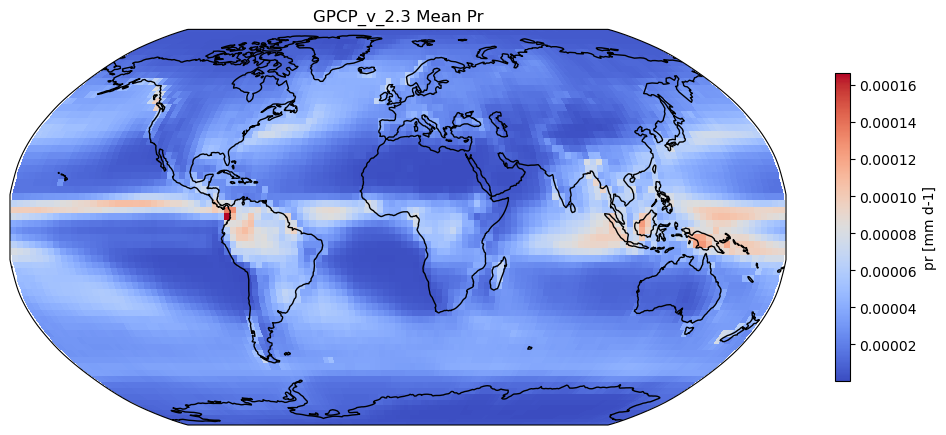

In [16]:
# Create a single plot for the WECANN data
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.Robinson()})

# Plot the regridded data
pr_data_Regridded_mean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm",
                                cbar_kwargs={"label": "pr [mm d-1]", "shrink": 0.4})
                               #vmin= 0, vmax= 12

# Add coastlines for context
ax.coastlines()

# Set the title for the plot
ax.set_title('GPCP_v_2.3 Mean Pr')

plt.tight_layout()
plt.show()

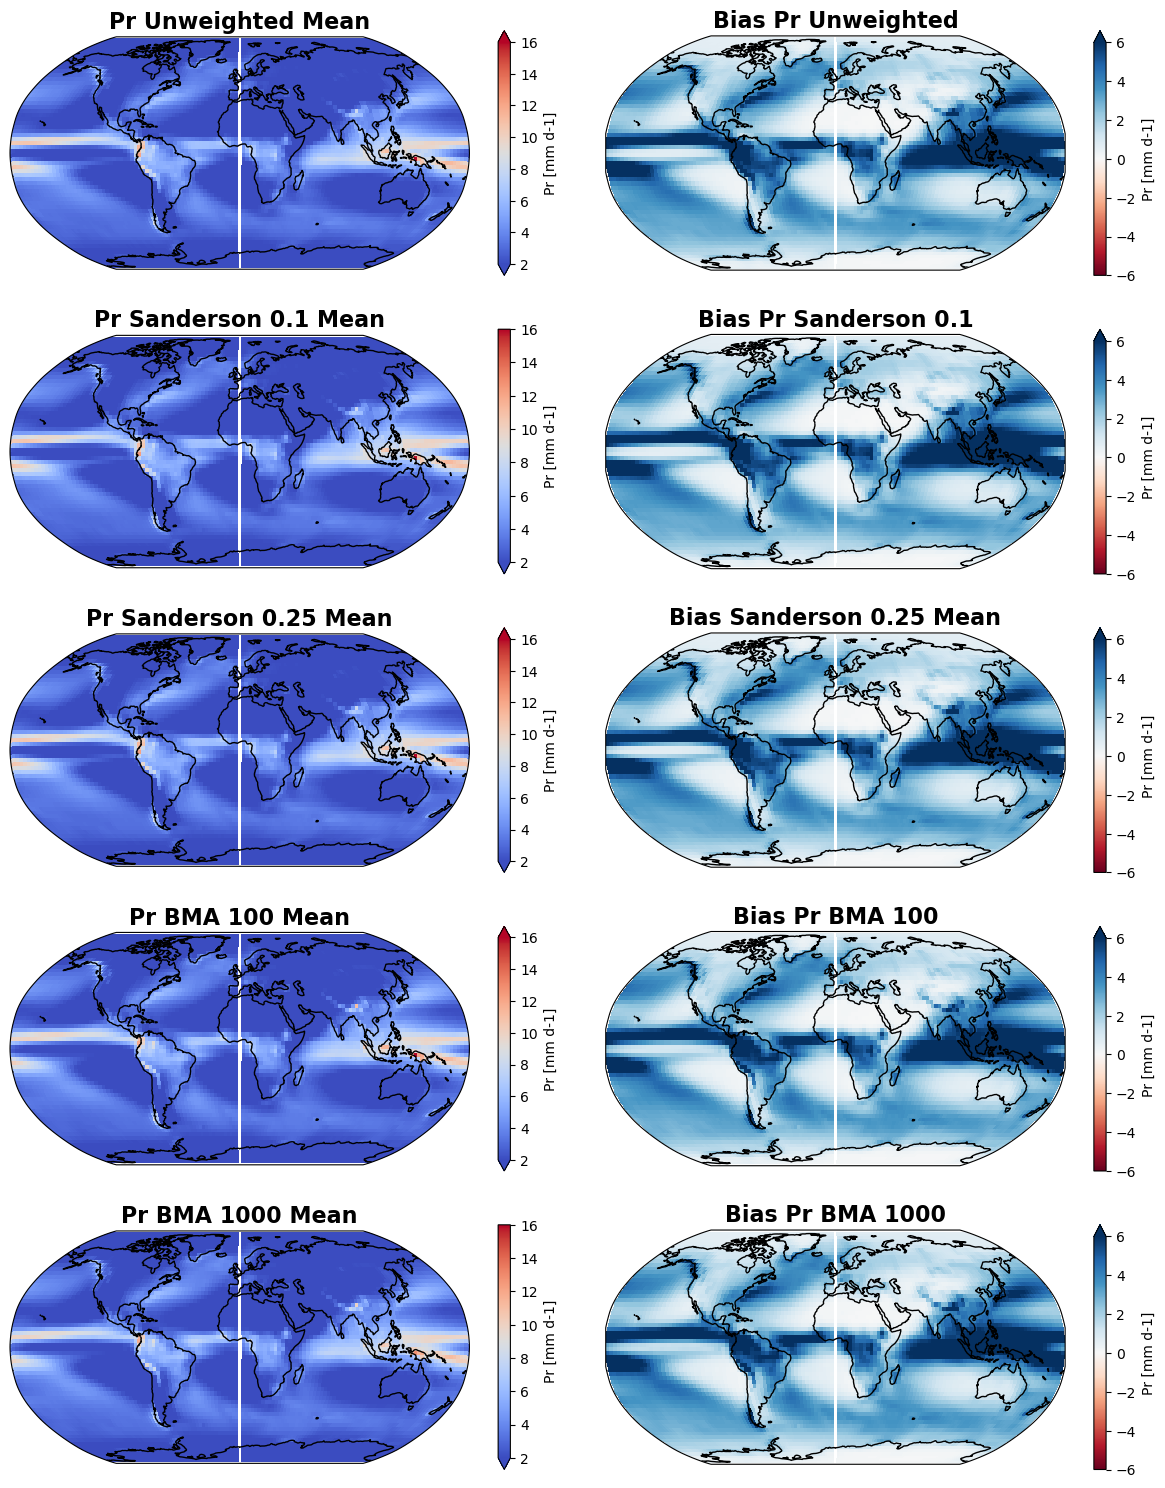

In [20]:
bias_unweighted = pr_model_mean_unweighted_shifted - pr_data_Regridded_mean
bias_sanderson10 =  pr_model_mean_weighted_shifted_sanderson_10 - pr_data_Regridded_mean
bias_sanderson25 =  pr_model_mean_weighted_shifted_sanderson_25 - pr_data_Regridded_mean
bias_BMA1000 = pr_model_mean_weighted_BMA1000_shifted - pr_data_Regridded_mean
bias_BMA100 = pr_model_mean_weighted_BMA100_shifted - pr_data_Regridded_mean
# Create a plot for the bias data
fig, axs = plt.subplots(5, 2, figsize=(12, 18), subplot_kw={'projection': ccrs.Robinson()})

# Plot each bias dataset on a subplot
for i, bias_data in enumerate([pr_model_mean_unweighted_shifted, bias_unweighted, pr_model_mean_weighted_shifted_sanderson_10, bias_sanderson10, pr_model_mean_weighted_shifted_sanderson_25, bias_sanderson25, pr_model_mean_weighted_BMA100_shifted, bias_BMA100, pr_model_mean_weighted_BMA1000_shifted, bias_BMA1000]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    if i % 2 == 0:
        cmap = "coolwarm"
        vmin, vmax = 2, 16  # Range for left maps
    else:
        cmap = "RdBu"
        vmin, vmax = -6, 6  # Range for right maps

    bias_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, vmin=vmin, vmax=vmax,
                   cbar_kwargs={"label": "Pr [mm d-1]", "shrink": 0.8})
    ax.coastlines()
    if i == 0:
        title = "Pr Unweighted Mean"
    elif i == 1:
        title = "Bias Pr Unweighted"
    elif i == 2:
        title = "Pr Sanderson 0.1 Mean"
    elif i == 3:
        title = "Bias Pr Sanderson 0.1"
    elif i == 4:
        title = "Pr Sanderson 0.25 Mean"
    elif i == 5:
        title = "Bias Sanderson 0.25 Mean"
    elif i == 6:
        title = "Pr BMA 100 Mean"
    elif i == 7:
        title = "Bias Pr BMA 100"
    elif i == 8:
        title = "Pr BMA 1000 Mean"
    elif i == 9:
        title = "Bias Pr BMA 1000"
    ax.set_title(title, fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()
